# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if we need to change directory to the project root
if os.path.basename(current_dir) == 'Scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'Scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import modules
try:
    from preprocessing import ReviewPreprocessor
    try:
        from scraper import main as run_scraper
    except ImportError:
        from scraper import main as run_scraper
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

Current working directory: c:\Users\Jose\Desktop\KAIM8\WEEK2\Code\Ethiopian Mobile Banking CX Insights\Scripts
Changed working directory to: c:\Users\Jose\Desktop\KAIM8\WEEK2\Code\Ethiopian Mobile Banking CX Insights


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.319121
Total Ratings: 38862
Total Reviews: 8336

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.190923
Total Ratings: 6358
Total Reviews: 1219

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.160494
Total Ratings: 3911
Total Reviews: 771

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:04<00:09,  4.83s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:09<00:04,  4.71s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:14<00:00,  4.71s/it]


Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Bank of Abyssinia: 400
  Dashen Bank: 400

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐
Review: Make it user friendly....
Date: 2025-11-29 08:17:45

Rating: ⭐⭐⭐
Review: maaliif daddafee install gaafata...
Date: 2025-11-28 13:36:32

Rating: ⭐⭐⭐⭐⭐
Review: good app...
Date: 2025-11-28 11:33:17

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: 🙏👍...
Date: 2025-11-29 03:47:54

Rating: ⭐⭐⭐⭐⭐
Review: Very Good...
Date: 2025-11-28 20:18:20

Rating: ⭐⭐⭐⭐⭐
Review: goof...
Date: 2025-11-28 13:33:37

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: Very exemplery App to other Bank Aps !...
Date: 2025-11-29 02:45:26

Rating: ⭐⭐⭐⭐⭐
Review: good...
Date: 2025-11-29 00:38:53

Rating: ⭐

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,Gurawaa Dooguu,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,Yohannesb Adugna,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [3]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_id: 278 (23.17%)

[2/6] Handling missing values...

[3/6] Removing duplicate reviews...
No duplicate reviews found

[4/6] Removing non-English reviews...
Removed 75 non-English reviews

[5/6] Removing emojis from review text...
Removed 0 reviews (empty after emoji removal); stripped 60 emoji characters

[3/6] Normalizing dates...
Date range: 2024-10-03 to 2025-11-29

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1125 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1125

Data retention rate: 93.75%
Data error rate: 6.25%
✓ Data quality: GOOD (<10% errors)

Reviews p

## 3. Visualizations

Let's explore the cleaned data.

C:\Users\Jose\AppData\Local\Temp\ipykernel_21856\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\Jose\AppData\Local\Temp\ipykernel_21856\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


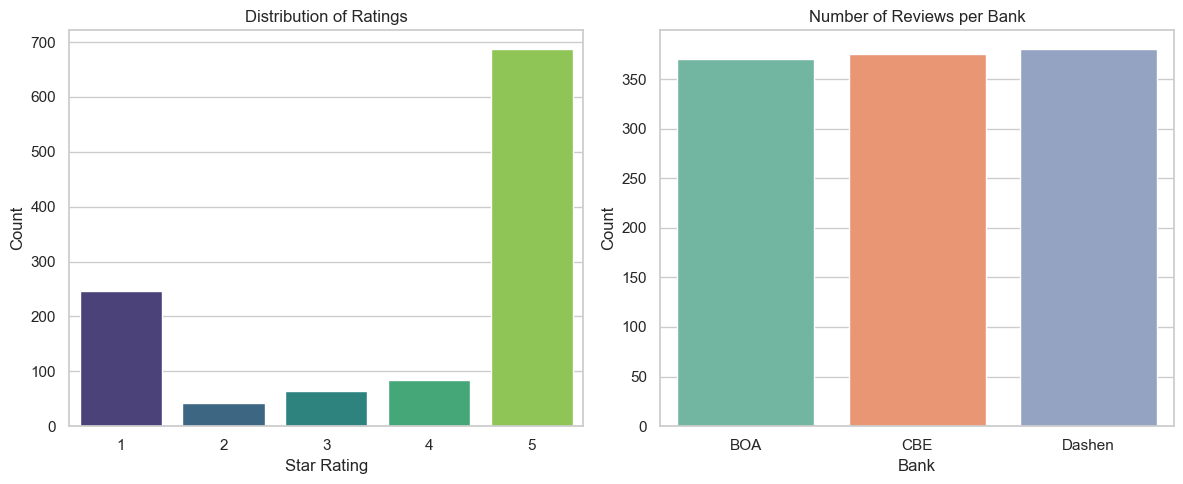

In [3]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

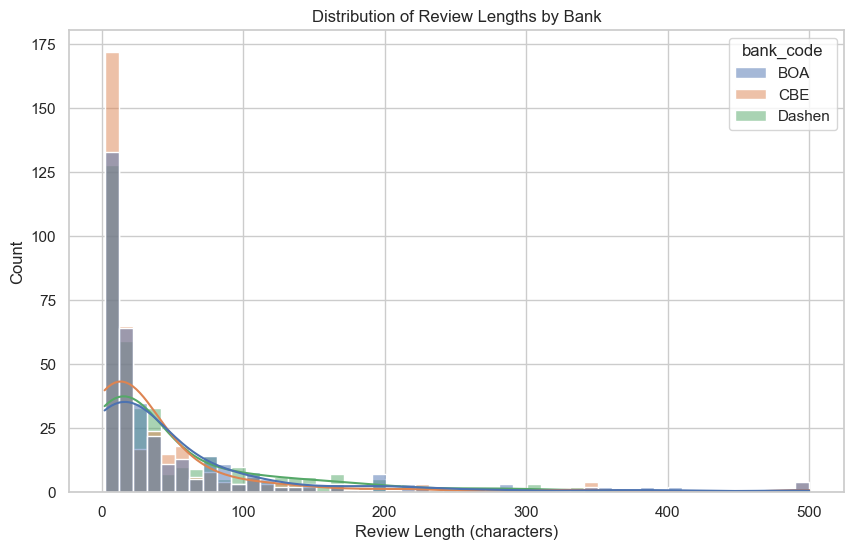

In [4]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()

C:\Users\Jose\AppData\Local\Temp\ipykernel_21856\1682056739.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(key=date_col, freq='M'), bank_col])


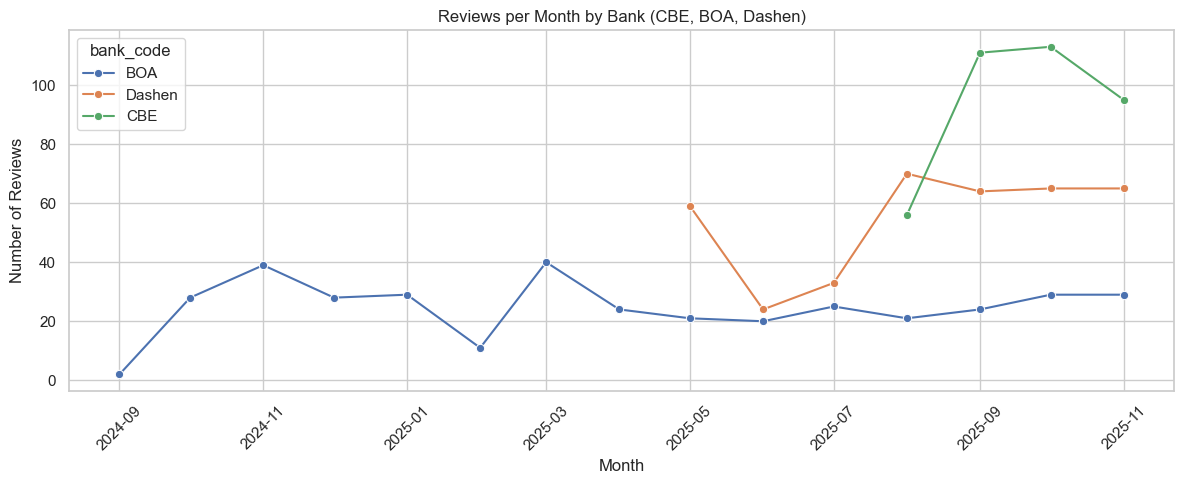

In [9]:
#Reviews per month (CBE, BOA, Dashen)
date_col = 'date' if 'date' in df.columns else ('at' if 'at' in df.columns else ('review_date' if 'review_date' in df.columns else 'timestamp'))
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

bank_col = 'bank_code' if 'bank_code' in df.columns else 'bank_name'
banks = ['CBE', 'BOA', 'Dashen']
df_banks = df[df[bank_col].isin(banks)].copy()

monthly_counts = (
    df_banks
    .groupby([pd.Grouper(key=date_col, freq='M'), bank_col])
    .size()
    .reset_index(name='reviews')
)
monthly_counts[date_col] = monthly_counts[date_col].dt.to_period('M').dt.to_timestamp()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_counts, x=date_col, y='reviews', hue=bank_col, marker='o')
plt.title('Reviews per Month by Bank (CBE, BOA, Dashen)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Jose\AppData\Local\Temp\ipykernel_21856\348103736.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(key=date_col, freq='M'), bank_col])['rating']


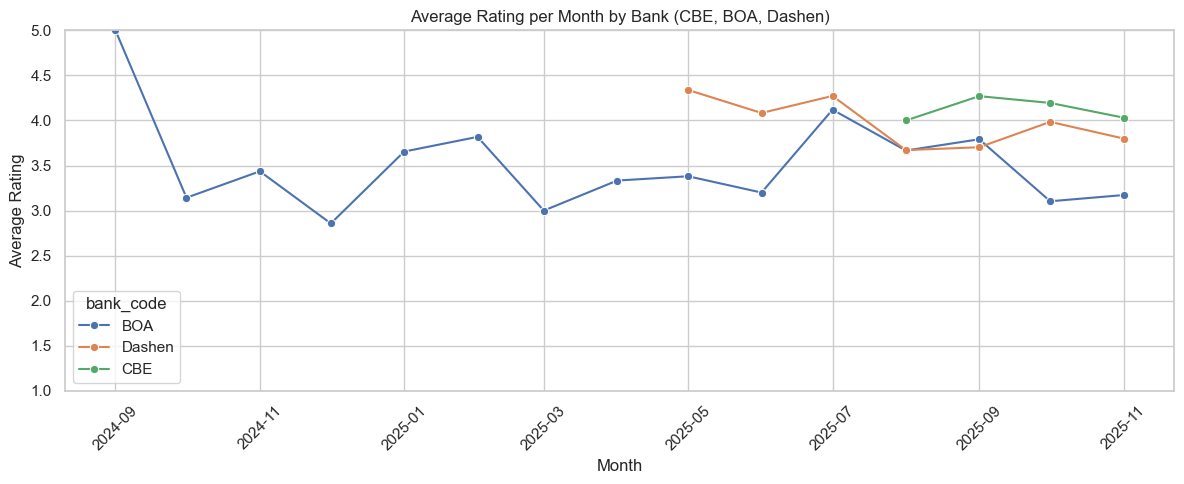

In [10]:
# Average rating per month (CBE, BOA, Dashen)
monthly_avg = (
    df_banks
    .groupby([pd.Grouper(key=date_col, freq='M'), bank_col])['rating']
    .mean()
    .reset_index(name='avg_rating')
)
monthly_avg[date_col] = monthly_avg[date_col].dt.to_period('M').dt.to_timestamp()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_avg, x=date_col, y='avg_rating', hue=bank_col, marker='o')
plt.title('Average Rating per Month by Bank (CBE, BOA, Dashen)')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(1, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
